# Project: Investigate a Dataset (TMDb Movie Data)

![caption](files/movies.PNG)

# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For data analysis, I picked up and selected the TMDb movie dataset. This dataset is required to carry out all of the Data Anaysis's technique and its methodology and it consists of information from The Movie Database (TMDb) regarding 10,000 movies, including user reviews and revenue. Also, there is often too much information available to make a clear decision. that is why I have chosen to search for more interesting trends in the results.  

### Strategical plan 
 1. Clean up the data after previewing it. 
    - Delete any information that isn't relevant to the analysis.  
    - Check and validate for null values and duplicated values.
    - Converting any data types which is not suitable for the Data Analysis. <br><br>
 2. Investigate the data and outline to findings
    - find useful facts, look at the statistics methedology. 
    - Group and filter certain data to find important patterns
    - look at the numbers, trends, and data and come to new conclusions based on the findings.
    - Illustrate the findings, plot the above data and construct a visualisation.
    - present the data findings or translate the data into an understandable document.
    
 
Questions
1. Which films are the most lucrative in terms of the box office?
2. Which films have the most and least profit, budget and runtime?
3. What effect does celebrity have on profit?
4. Which years were the most profitable for films? 
5. What are the most well-known actors, directors, and genres? 
6. Which months have the highest film profits?
  

In [1]:
# Import necessary libraries for initial data understanding, visualisations and exploratory data analysis
# Import all libraries
import pandas as pd # converting an entire data table into a NumPy matrix array
import numpy as np  # helping to avoid namespace issues
import matplotlib.pyplot as plt # creating or plotting area in a figure, lines  and decorates the plot with labels, etc.
%matplotlib inline
import seaborn as sns # Importing seaborn
from datetime import datetime as dt
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# import the data
# Load tmdb csv file and preview the first 5 rows
movies = pd.read_csv('tmdb-movies.csv')# importing 'tmdb-movies data'
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# showing data structure of Movies datasets including number of rows and columns of the dataset
movies.shape

(10866, 21)

In [4]:
# viewing Movies dataset
movies.head(1).columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
# data types of Movies dataset
movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# Printing a concise summary of the data and Information about the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
# Generating the descriptive statistics of the data
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
# Preview overall distribution of data from each properties
movies.hist(figsize = (15,15), bins=60);

There appear to be a lot of 0 values on budget and revenue based on the histograms shown.
For more reliable results, rows containing these values can need to be omitted. 

In [ ]:
# Let's take a look at how many they have. 
print(movies[movies['budget']==0].shape)
print(movies[movies['revenue']==0].shape)
print(movies[movies['popularity']==0].shape)

- According to the above, there are 5696 and 6016 counts of 0 values in the budget and revenue columns, respectively, which is quite a large number.In the popularity column, there are no 0 values. 


- Since each film receives a variety amount of votes, details such as vote count and vote average may be useless. 


- The columns id, imdb id, homepage, keywords, overview, production companies, vote count, vote average,  budget adj and revenue adj  are not useful and can be removed from the dataset.  


Keep going...
- Columns that aren't necessary for further analysis should be removed. 
- Apart from budget and revenue, delete duplicated and null values columns. 
- The budget and revenue that have no values must be Removed from films.



In [ ]:
print(movies.head())

In [ ]:
# check unique numbers for each column in Movies dataset
movies.nunique()

In [ ]:
# Deleting any columns that are no longer needed. 
movies.drop(['id', 'imdb_id','budget_adj', 'revenue_adj', 'homepage', 'keywords', 'tagline',
                              'overview', 'production_companies', 'vote_count', 'vote_average'], axis=1, inplace=True)

In [ ]:
# Inspecting remaining columns 
movies.head(1)

In [ ]:
movies.dtypes

In [ ]:
# Altering the Release date from a string to a datetime format, as well as the budget and revenue, to integers. 
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['budget'] = movies['budget'].astype(int)
movies['revenue'] = movies['revenue'].astype(int)
movies['popularity'] = movies['popularity'].astype(int)

In [ ]:
# Counting total duplicates
movies.duplicated().sum()

In [ ]:
# Removing all duplicates
movies.drop_duplicates(inplace=True)

In [ ]:
# Checking for null values. 
movies.isnull().sum()

In [ ]:
# Filling the null values with zero. Check again
movies.fillna(0, inplace = True)

In [ ]:
# Removing rows with zero values in budget and revenue
movies['budget'] = movies['budget'].replace(0, np.NaN)
movies['revenue'] = movies['revenue'].replace(0, np.NaN)

movies.dropna(inplace =True)

In [ ]:
# Checking for values to be removed
print(movies.isnull().sum())
print(movies.duplicated().sum())

<a id='eda'></a>
## Exploratory Data Analysis
After cleaning up the data and deleting any irrelevant information that may have an effect on the data set.
The data is now available to be used to respond to questions, analyse statistics and create visualisations to research relationships. 

### Question 1. Which films are the most lucrative in terms of the box office?

In [ ]:
# Making a new column for the profit  to determine which film is the most profitable. Make sure the datatype is integer. 
movies['profit'] = movies['revenue'] - movies['budget']
movies['revenue'] = movies['revenue'].astype(int)
movies.head(1)

In [ ]:
# Ordering by the data by benefit and display the top 10 rows. 
movies.sort_values(['profit'], ascending = False).head(10)

The top ten highest-grossing films are listed above. These are obviously well-known names.
Avatar is at the top of the box office, grossing much more than the films that came after it. 

### Question 2. Which films have the most and least profit, budget and runtime?

In [ ]:
# Creating a function to calculate the maximum and minimum number of films in each genre. 
def max_min_data(column_name):
    
    # Seeking the maximum from the column's index number and save it to movies. 
    highest_movie = movies[column_name].idxmax()
    highest_movies = pd.DataFrame(movies.loc[highest_movie])
    
    # Seeking the minimum from the column's index number and save it to movies. 
    lowest_movie = movies[column_name].idxmin()
    lowest_movies = pd.DataFrame(movies.loc[lowest_movie])
    
    # combining two films into one 
    max_min_data = pd.concat([highest_movies, lowest_movies], axis = 1)
    
    return max_min_data


max_min_data('profit')
    

In [ ]:
# Applying the same function for budget
max_min_data('budget')

In [ ]:
# Applying the same function for runtime
max_min_data('runtime')

In [ ]:
movies.describe()

After looking at the budget and runtime categories, we can see that Avatar makes the most money.
When applied to the overall numbers, the feature makes sense. In contrast to other films, Avatar has a 75 percent longer runtime and a 75 percent higher budget. It demonstrates that making a successful film necessitates a lot of work. 

Let's look at some data in the form of graphical plots to help visualise and comprehend the query. 


In [ ]:
# Designing a bar chart for the top ten most successful films. 
# Ordering the raw data by benefit first. 
sorted_profit = movies['profit'].sort_values(ascending=False)[:10]

# Building a benefit and title list that can be applied as the X-axis and Y-axis values in a bar graph. 
high_profit=pd.DataFrame()
titles=[]
profit=[]

# Completing the values with raw data and sum up them to the lists. 
for i in sorted_profit.index:
    titles.append(movies.loc[i,'original_title'])
    profit.append(sorted_profit.loc[i])
high_profit['Titles']=titles
high_profit['Profit']=profit
high_profit.set_index('Titles',inplace=True)

# Plotting
high_profit.plot(kind ='bar',color='green', figsize=(10,7))
plt.title('Top 10 movies with the most profit');
plt.ylabel('profit in billions ($)');
sns.set_style('darkgrid')

According to the results, the film avatar made the most money out of all the films in the dataset; its profit is nearly double that of 'the Net' in the top ten.

In [ ]:
# Having the same thing about your budget. 
profit_year = movies.groupby('release_year')['budget'].sum()
profit_year.head(5)# See the top 10 movies with the most expense
sorted_budget = movies['budget'].sort_values(ascending=False)[:10]
high_budget=pd.DataFrame()
titles_exp=[]
budgets=[]
for i in sorted_budget.index:
    titles_exp.append(movies.loc[i,'original_title'])
    budgets.append(sorted_budget.loc[i])
high_budget['Titles']=titles_exp
high_budget['Budgets']=budgets
high_budget.set_index('Titles',inplace=True)
high_budget.plot(kind ='bar',color='green', figsize=(10,8))
plt.title('Top 10 movies with the most budget ');
plt.ylabel('Budget in 100\'s of million');

The table above depicted the top ten film budgets. The film 'The Warrior's Way' cost about $400 million to make, which is much more than most films make in profit. It might not be one of the most famous films. 

In [ ]:
# Making a histogram for film runtimes.
movies['runtime'].hist(figsize = (10,10), color='green', bins = 50)
plt.xlabel('Runtime', fontsize = 16)
plt.ylabel('Number of Movies', fontsize=16)
plt.title('Runtime distribution of all the movies', fontsize=18);

The majority of films are about 110 minutes long, which is consistent with the statistics presented earlier. 

In [ ]:
# Plotting Box plot for Runtime.
movies['runtime'].plot(kind = 'box',color='green', figsize = (10,10));
plt.ylabel('Minutes', fontsize=16)
plt.xlabel('Runtime', fontsize=16)
plt.title('Runtime distribution of all the movies', fontsize=20);

The Box plot for runtime is shown below. At 350 minutes and 15 minutes, there are a handful of outliers.
Since there are only 10,000 films in the database, this shouldn't have an effect on the total results. 

### Question 3. What effect does celebrity have on profit?

In [ ]:
# To investigate the relationship between popularity and porfit, make a scatter storey. 
ax = sns.regplot(x=movies['popularity'],y=movies['profit'],color='green')
# Creating a scatter plot with a title and labels. 
ax.set_title("Popularity Vs Profit",fontsize=18)
ax.set_xlabel("Popularity",fontsize=16)
ax.set_ylabel("Profit",fontsize=16)

# Making the size of the figure. 
sns.set(rc={'figure.figsize':(8,6)})


def correlation_coeff(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return(std_x*std_y).mean()

correlation_coeff(movies['popularity'],movies['profit'])


It can be inferred from the scatter plot that there is a positive relationship between popularity and benefit.
The trend line is pointing upwards, and the correlation coefficient value has been determined to be positive.
The lower correlation coefficient value, on the other hand, is less attractive and may be attributed to movies with a high budget but low profit margin or other similar circumstances. 

### Question 4. Which years were the most profitable for films?

In [ ]:
# Next, dividing the gross benefit by the number of years. 
profit_year = movies.groupby('release_year')['profit'].sum()
profit_year.head(5)

In [ ]:
# Making a graph of the query above. 
profit_year.plot(figsize = (12,8), color='green')
plt.xlabel('Movies released year', fontsize = 14)
plt.ylabel('Total Profits made by Movies', fontsize = 14)
plt.title('Total Profits vs Movie Years', fontsize = 16);

When struggling with time and numbers, a line plot can come in handy. Profits increase as the number of years increases, as seen in the graph. 

In [ ]:
# Making the same for the budget
budget_year = movies.groupby('release_year')['budget'].sum()
budget_year.head(5)

# Making a graph of the query above.
profit_year.plot(figsize = (12,8),color='green')
plt.xlabel('Movies released year', fontsize = 14)
plt.ylabel('Total budgets made by Movies', fontsize = 14)
plt.title('Total budgets vs Movie Years', fontsize = 16);

Profit and budgets have followed similar patterns over time. Both rises and peak at around year 2010.
Great films are made with more money and effort, which makes sense. 


### Question 5. What are the most well-known actors, directors, and genres?

In [ ]:
# To learn more about the cast, we'll break down each character in each film into different categories. 
movies.loc[:,['original_title', 'cast', 'director', 'genres']].head()

In [ ]:
def extract_data(column_name):
    movies['cast']=movies['cast'].astype(str)
    movies['director']=movies['director'].astype(str)
    
    # Splitting the string by '|' from the column entered. 
    all_data = movies[column_name].str.cat(sep = '|')
    
    # Separating the principles and save them as a sequence. 
    all_data = pd.Series(all_data.split('|'))
    
    # Look at the list in descending order, beginning with the highest number. 
    count = all_data.value_counts(ascending = False)
    
    return count

In [ ]:
# Applying the function for the casts.
cast_count = extract_data('cast')
cast_count = pd.DataFrame(data=cast_count)

top_cast = cast_count.head(10)
top_cast

In [ ]:
# Applying the function for the directors, plot.
director_count = extract_data('director')
director_count = pd.DataFrame(data=director_count)

top_director = director_count.head(10)
top_director

In [ ]:
movies.genres.unique()

In [ ]:
# Applying the function for the genres, plot.
genres_count = extract_data('genres')
genres_count = pd.DataFrame(data=genres_count)

top_genres = genres_count.head(10)
top_genres

### Question 6. Which months have the highest film profits?

In [46]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

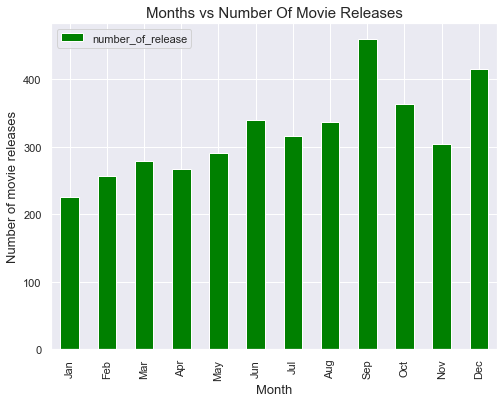

In [47]:
# The month number can be found by subtracting the release date from the month number. 
month_release = movies['release_date'].dt.month

# Using value counts, count the number of movies in each month (). 
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

# Adjusting the new dataframe's column name to 'number of release'. 
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

# Using plot, construct a bar graph. 
number_of_release.plot(x='month',kind='bar',color='green', fontsize = 11,figsize=(8,6))

# Having the plot's names and titles.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")

We can deduce from the graph that the months of September and October have a higher number of releases. 

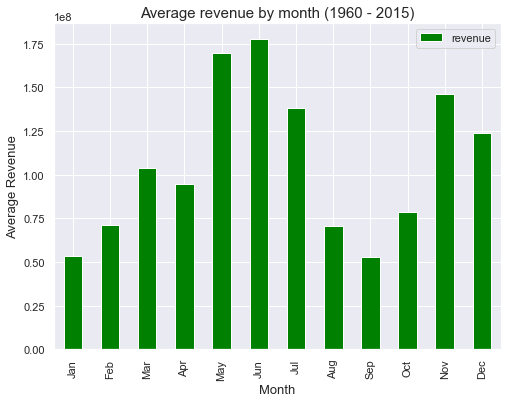

In [48]:
# Making a dataframe in which each film's release month is stored. 
month_release = pd.DataFrame(month_release)

# Modifying the column name of the new dataframe 'month_release'.
month_release.rename(columns = {'release_date':'release_month'},inplace=True)

# Sum up a new column 'revenue' in the dataframe 'month_release'.
month_release['revenue'] = movies['revenue']

# Making the group of the data according to their month and calculate the mean revenue of each month.
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months

# Making the bar plot using pandas plot function.
mean_revenue.plot(x='month',kind='bar',color='green',figsize = (8,6),fontsize=11)

# Having the title and lables of the plot.
plt.title('Average revenue by month (1960 - 2015)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("darkgrid")

According to the plot , films released in the months of May and June have a higher revenue than films released in other months. It may also have arisen as a result of outliers. 

<a id='conclusions'></a>
## Conclusions

A wealth of information about all films has been embedded The TMDb movie dataset.
To have more reliable performance, null values, duplicated values, and 0 values were removed after Data Wrangling.
In addition, incorrect datatypes were corrected, and new columns for further review, such as profit and monthly profit average, were produced further analysis  

To help visualise and respond to questions, line plots, bar charts, and histograms are generated.
The top profits, budgets, casts, directors, genres, and so on were all shown in the reports, as well as the average profits generated by each month.
This provide useful statistics about which film characters receive the most interest and how many more films are sold in each month compared to the previous month. 

- Profits: Profits are linked to budget and popularity in a positive way. 
- Runtime: The total length of both films is 101.22 minutes. 
- Profit by months: In the summer, the months of May and June have the highest average film earnings. The next two months with the highest mean film earnings are November and December. 
- 1st rank  cast: Robert De Niro
- 1st rank director: Steven Spielberg
- 1st rank genre: Drama

### Assumption: 
Yet we were able to consistently pre-edit the above features on the TMDb movie dataset, many details were lost, such as rows with 0 values and null values. The dataset was reduced by a few thousand rows of films, which had a significant impact on the outcome. Furthermore, each film won a various number of votes.
As a result, films with several or more votes would be inaccurate. To make the information useful for data analysis, it should be collected in a consistent manner.


## Sources.


- Pandas documentation <br>

- Kaggle guide<br>

- Stack Overflow<br>

- w3schools<br>

- Guru99<br>

- Tutorialspoint<br>

- Realpython<br>